
# Penyusun

*   Nama  : Zhafran Pradistyatama Kuncoro
*   Email : zhafrankuncoro@gmail.com
*   ID DICODING: zhafrankuncoro / MC223D5Y0339
*   Link Dataset: [Dataset Diabetes](https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset/data)



# 1. Import Library
Pada bagian ini, dilakukan import berbagai library yang akan digunakan dalam proses pengolahan data, eksplorasi, pemodelan, hingga evaluasi model.

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# 2. Load Dataset

In [5]:
df = pd.read_csv('/content/Dataset_Diabetes.csv')

df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


Terdapat 1000 rows dan 14 Columns

# 3. Data Understanding

## 3.1 Info Dataset

In [7]:
# Menampilkan 5 dataset teratas
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [8]:
# Melihat Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [9]:
# Melihat Deskripsi Statistik Dataset
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [10]:
# Melihat dataset apakah ada missing values
df.isnull().sum()

,0
ID,0
No_Pation,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


In [11]:
# Melihat apakah ada data yang duplikat
df.duplicated().sum()

np.int64(0)

insight


*   Missing value: 0
*   Data Duplicated: 0
*   Kolom yang akan dihapus: ID & No_Pation



## 3.2 Univarite Analysis

In [18]:
numerical_features = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

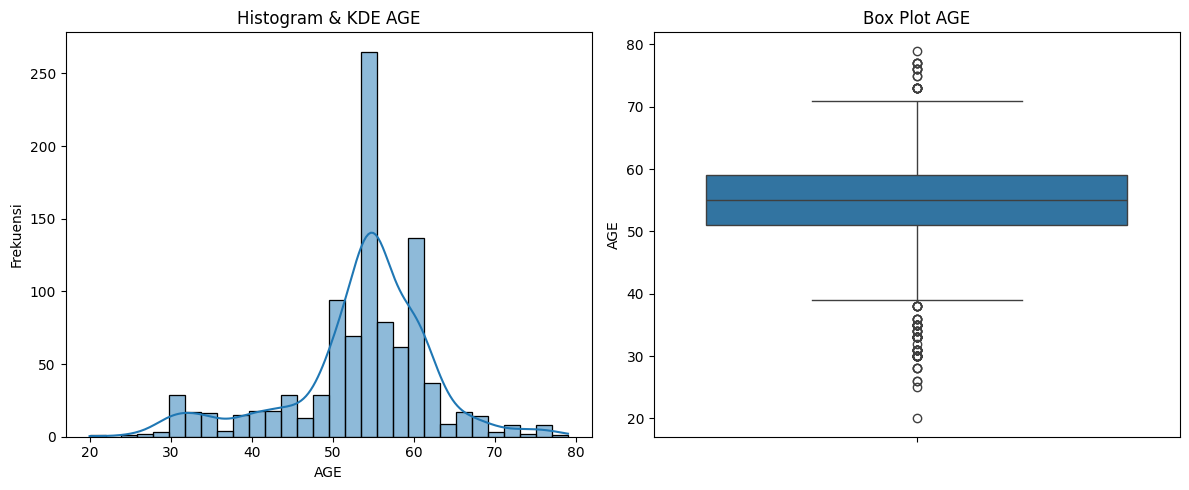

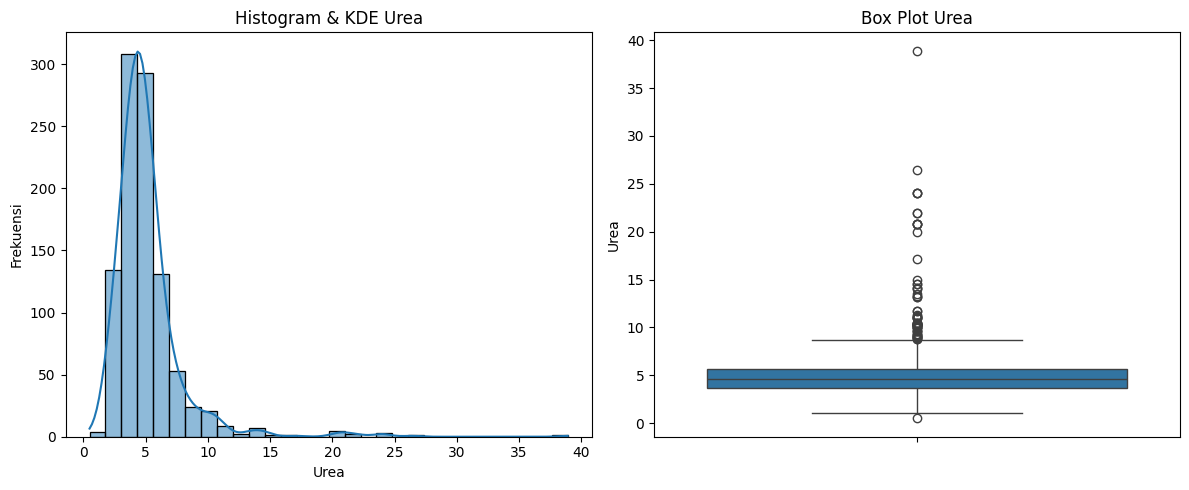

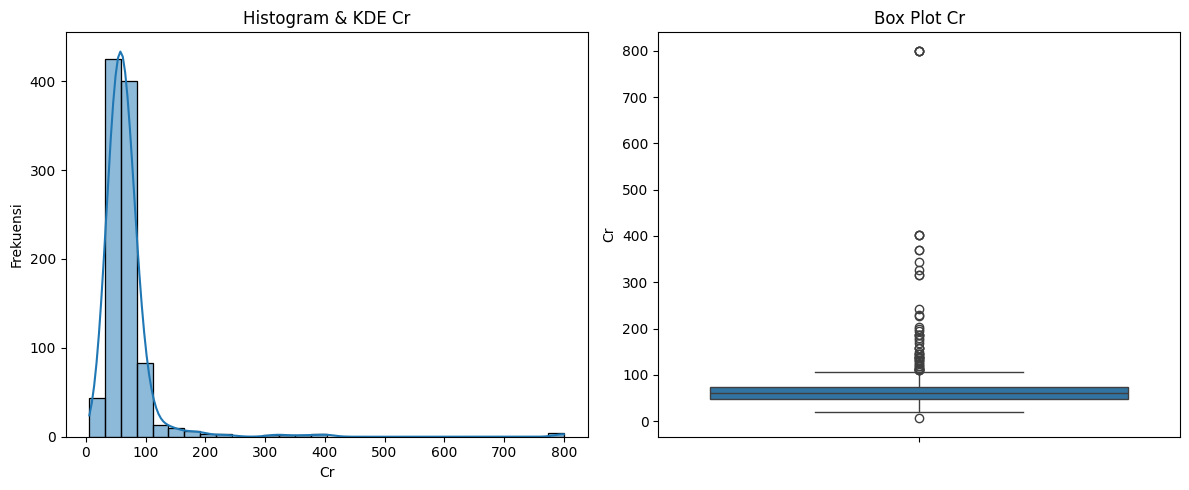

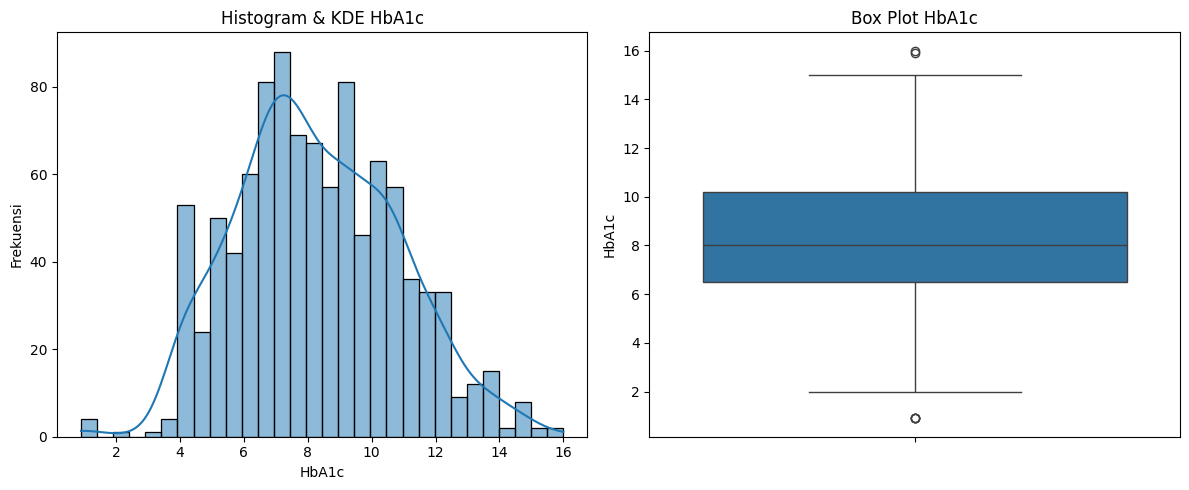

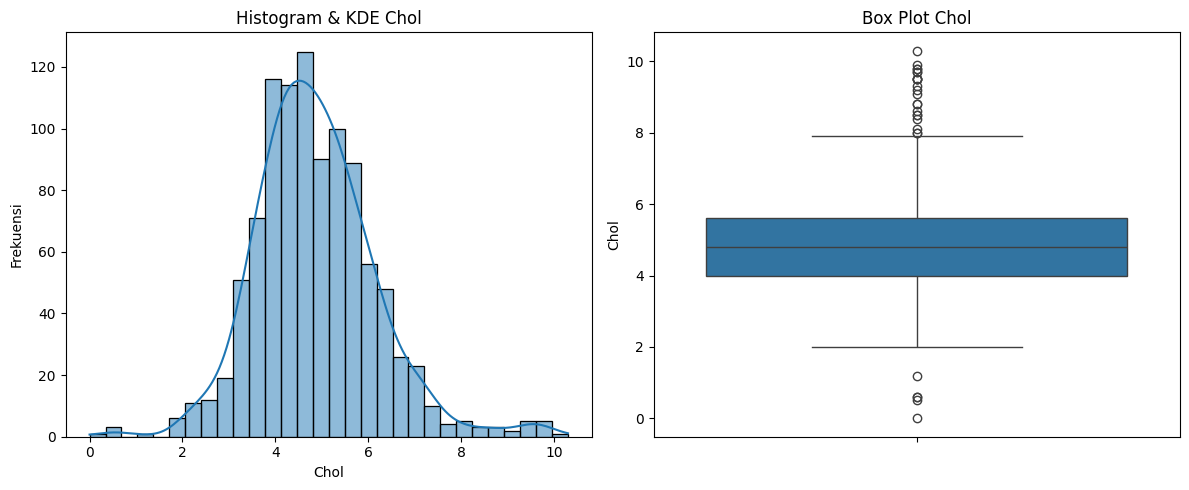

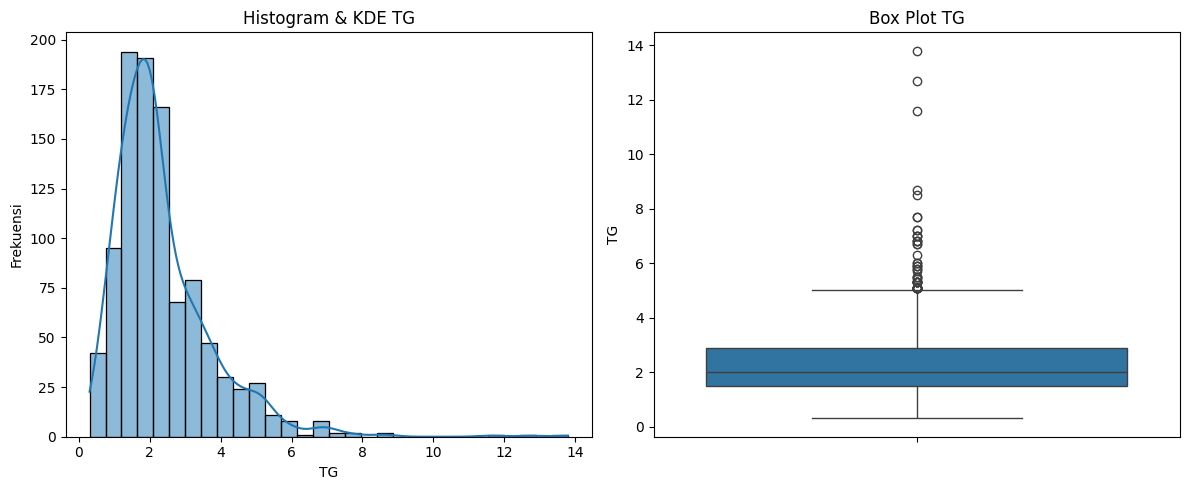

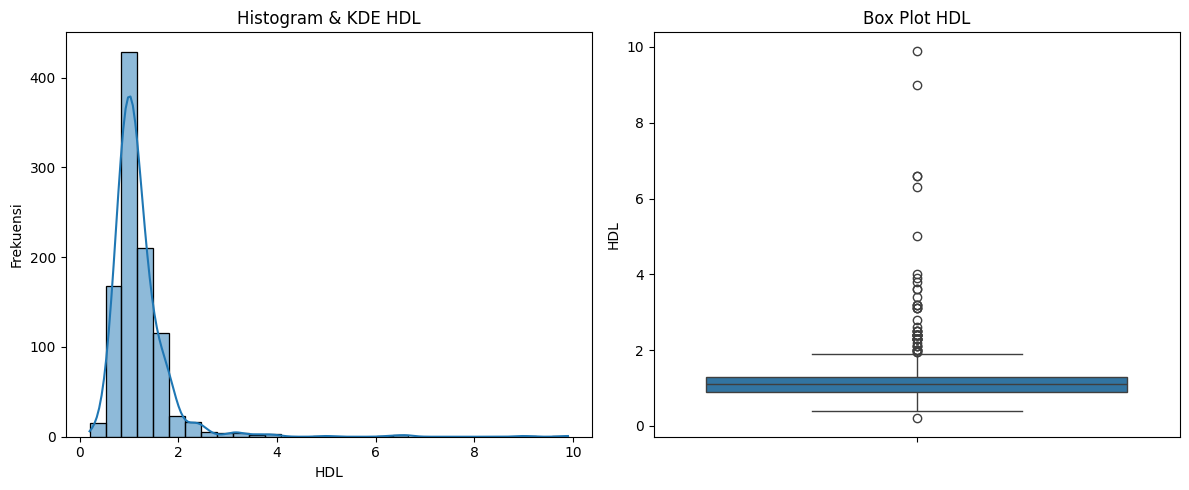

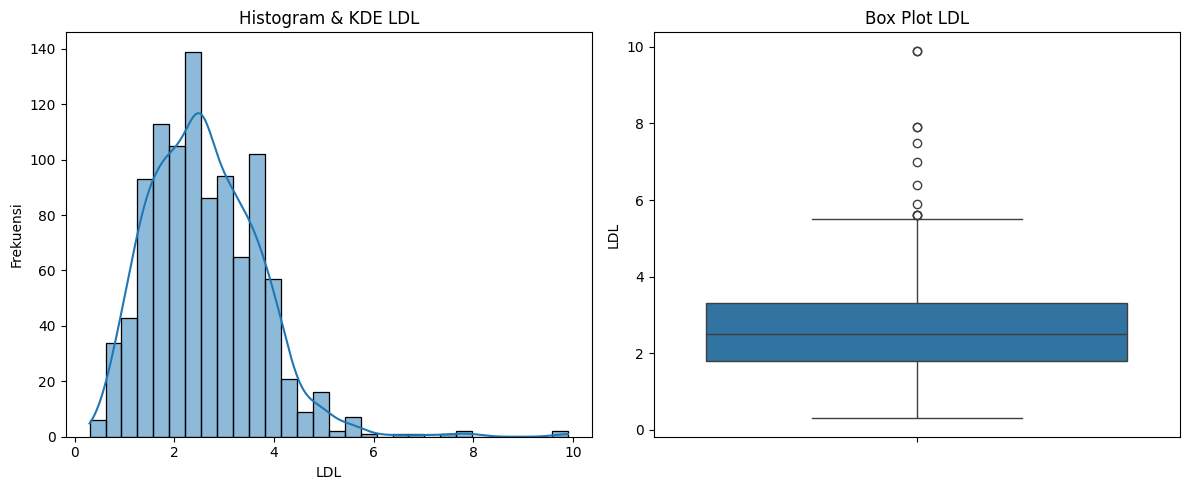

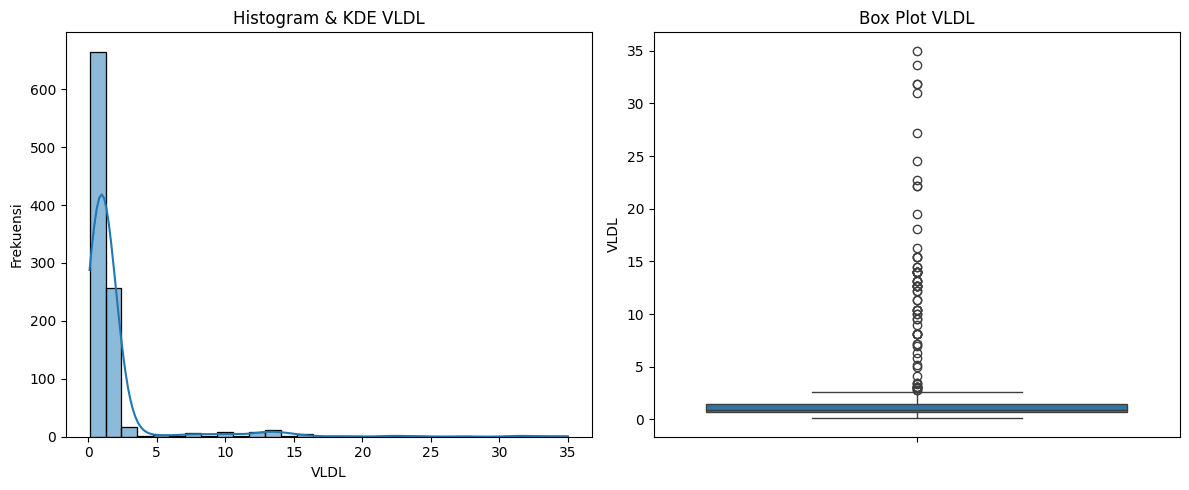

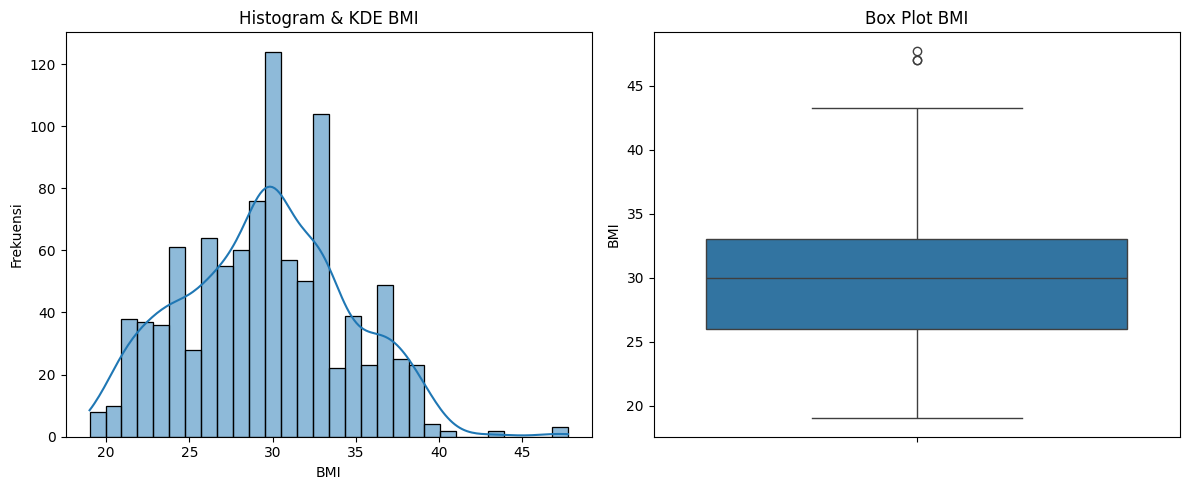

In [21]:
# Analisis Fitur Numerik
for col in numerical_features:
    if col in df.columns:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram & KDE {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col]) # y untuk orientasi vertikal
        plt.title(f'Box Plot {col}')
        plt.ylabel(col)

        plt.tight_layout()
        plt.show()


<ipython-input-23-ca149ffce761>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], data=df, palette="pastel", order = df[col].value_counts().index)


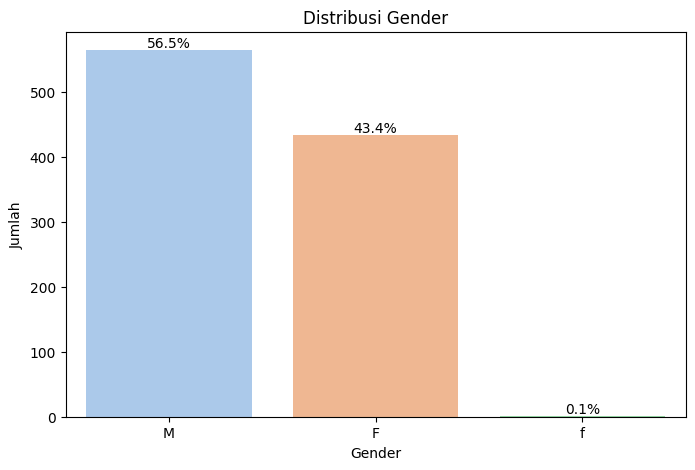

In [23]:
# Analisis Fitur Kategorikal
categorical_features_eda = ['Gender'] # Kolom 'CLASS' akan di analisis sebagai kolom target
for col in categorical_features_eda:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        ax = sns.countplot(x=df[col], data=df, palette="pastel", order = df[col].value_counts().index)
        plt.title(f'Distribusi {col}')
        plt.xlabel(col)
        plt.ylabel('Jumlah')
        # Menambahkan persentase pada bar
        total = len(df[col])
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            x_bar = p.get_x() + p.get_width() / 2
            y_bar = p.get_height()
            ax.annotate(percentage, (x_bar, y_bar), ha='center', va='bottom')
        plt.show()


<ipython-input-25-2f856cc7e5a6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_target = sns.countplot(x=df[target_col], data=df, palette="Set2", order = df[target_col].value_counts().index)


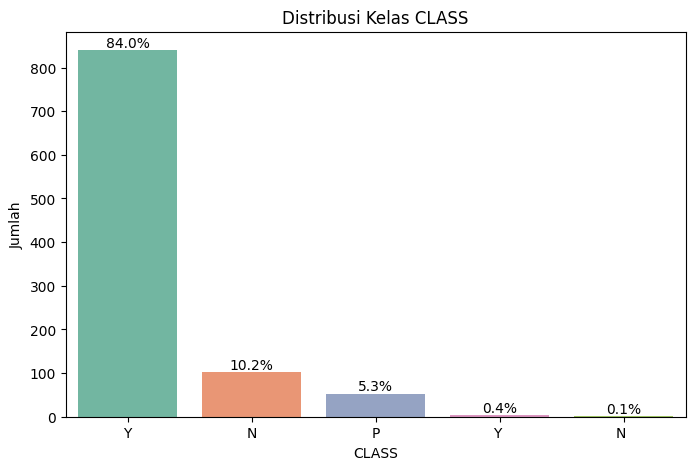

In [25]:
# nalisis Variabel Target ('CLASS')
target_col = 'CLASS'

if target_col in df.columns:
    plt.figure(figsize=(8, 5))
    ax_target = sns.countplot(x=df[target_col], data=df, palette="Set2", order = df[target_col].value_counts().index)
    plt.title(f'Distribusi Kelas {target_col}')
    plt.xlabel(target_col)
    plt.ylabel('Jumlah')
    total_target = len(df[target_col])
    for p in ax_target.patches:
        percentage_target = f'{100 * p.get_height() / total_target:.1f}%'
        x_bar_target = p.get_x() + p.get_width() / 2
        y_bar_target = p.get_height()
        ax_target.annotate(percentage_target, (x_bar_target, y_bar_target), ha='center', va='bottom')
    plt.show()


Insight


*   Bisa dilihat terdapat beberapa outlier yang ada di beberapa kolom numerik, akan tetapi kita tidak akan menghapusnya, karena kita akan menggunakan algoritma Decission Tree dan Random Forest, yang dimana sangat bisa untuk mengatasi outlier. Jika kita menghapus outlier, takutnya akan menghilangkan informasi penting pada data

*   Masih ada kesalahan pada kolom Gender dan CLASS, akan di atasi di Data Preaparation



## 3.3 Multivariate Analysis

<ipython-input-26-9d1d194a74c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target_col], y=df[col], palette="viridis")
<ipython-input-26-9d1d194a74c7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[target_col], y=df[col], palette="plasma", inner="quartile")


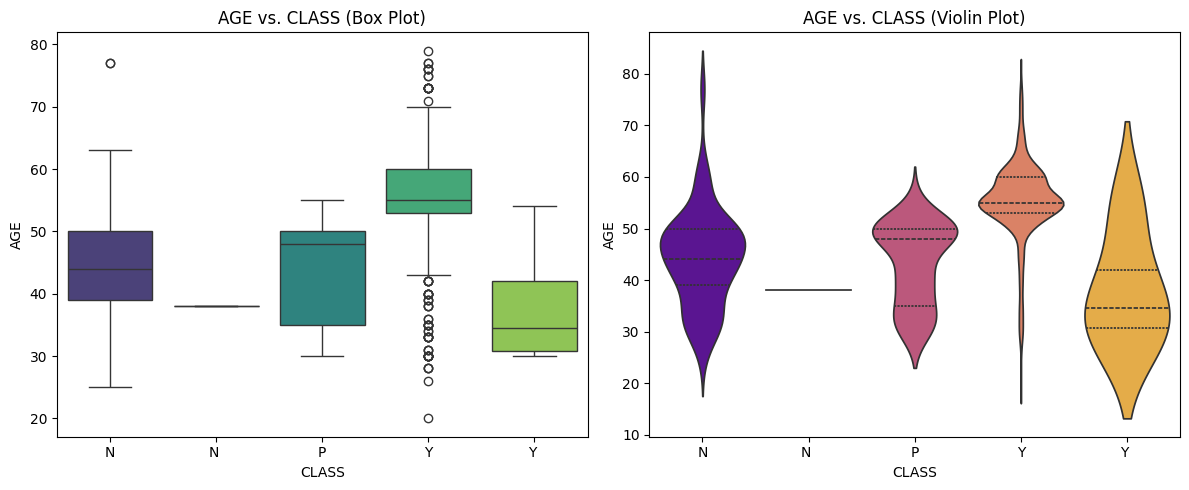

<ipython-input-26-9d1d194a74c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target_col], y=df[col], palette="viridis")
<ipython-input-26-9d1d194a74c7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[target_col], y=df[col], palette="plasma", inner="quartile")


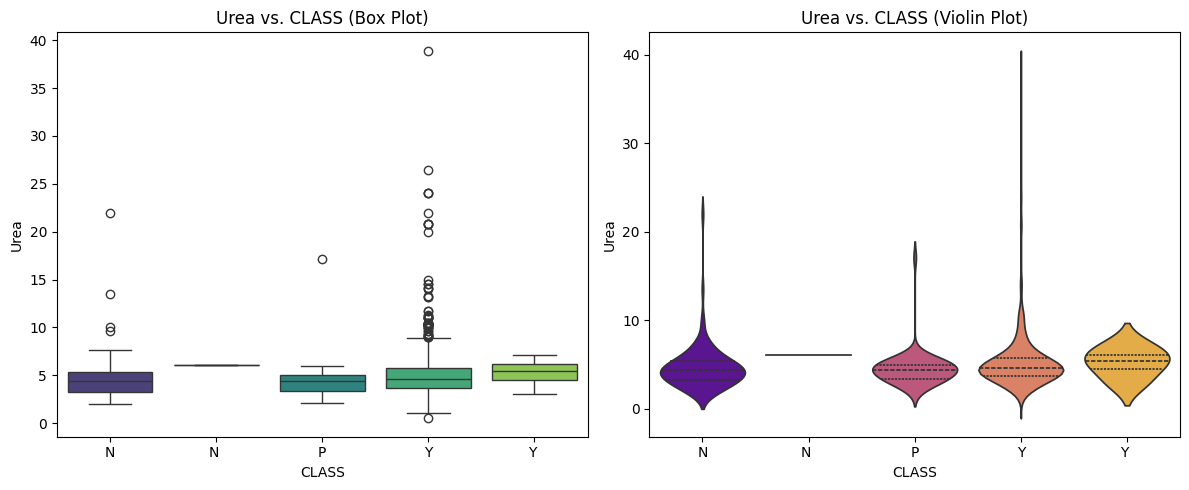

<ipython-input-26-9d1d194a74c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target_col], y=df[col], palette="viridis")
<ipython-input-26-9d1d194a74c7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[target_col], y=df[col], palette="plasma", inner="quartile")


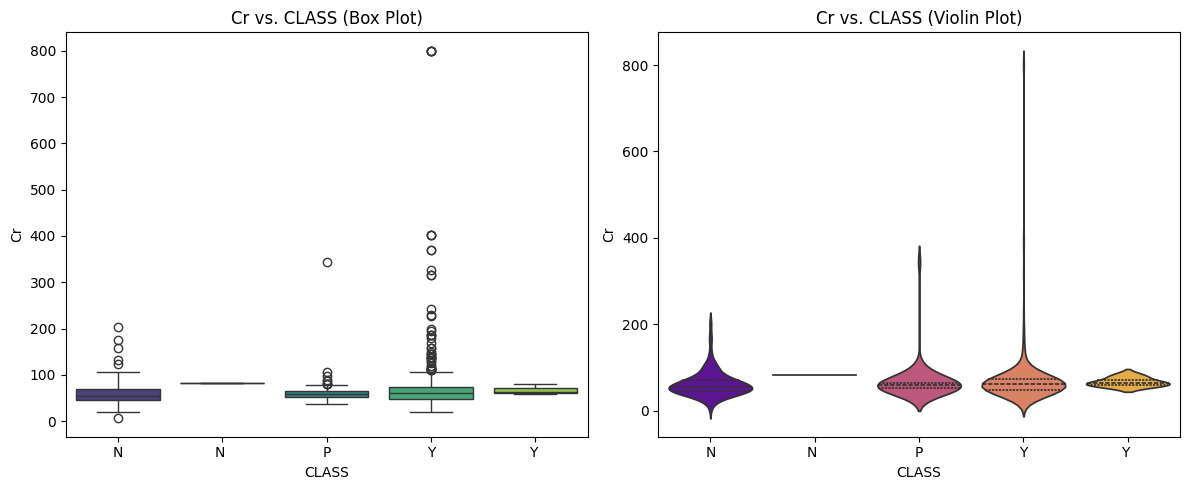

<ipython-input-26-9d1d194a74c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target_col], y=df[col], palette="viridis")
<ipython-input-26-9d1d194a74c7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[target_col], y=df[col], palette="plasma", inner="quartile")


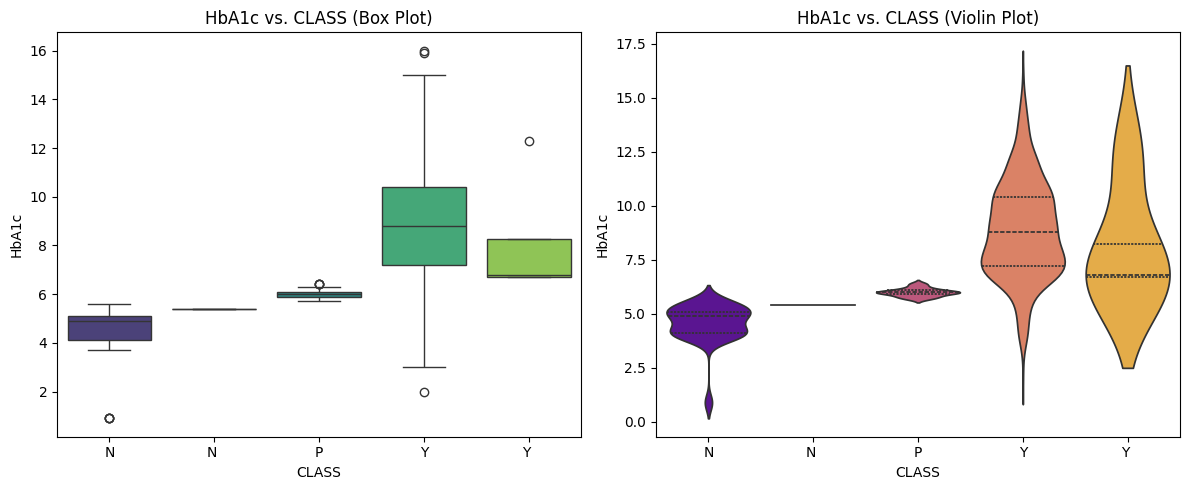

<ipython-input-26-9d1d194a74c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target_col], y=df[col], palette="viridis")
<ipython-input-26-9d1d194a74c7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[target_col], y=df[col], palette="plasma", inner="quartile")


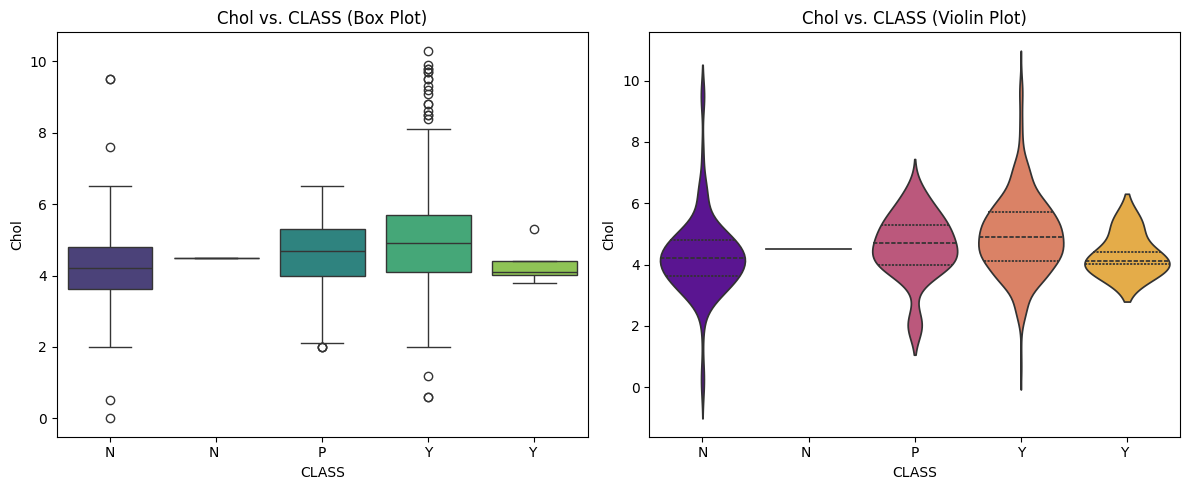

<ipython-input-26-9d1d194a74c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target_col], y=df[col], palette="viridis")
<ipython-input-26-9d1d194a74c7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[target_col], y=df[col], palette="plasma", inner="quartile")


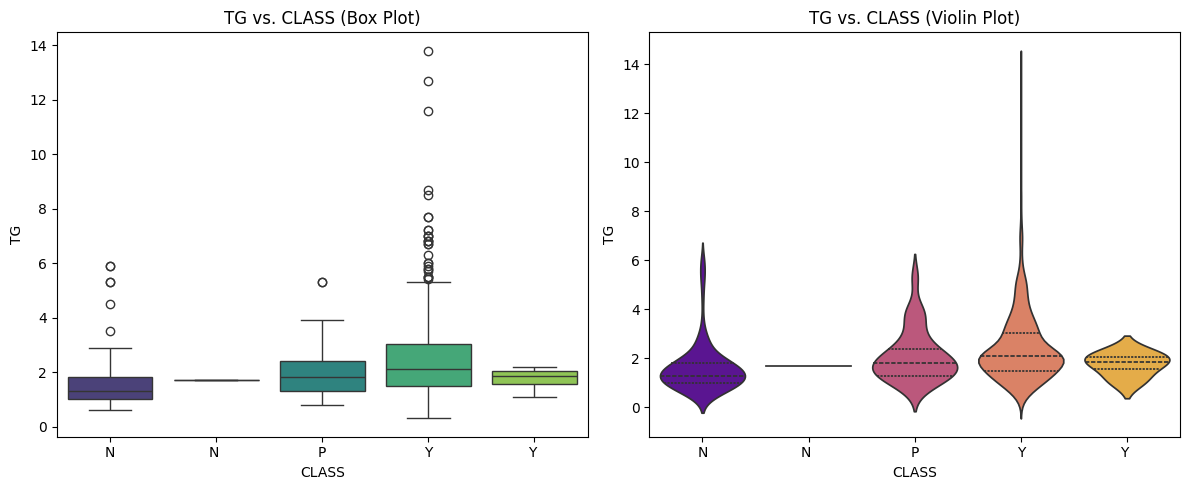

<ipython-input-26-9d1d194a74c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target_col], y=df[col], palette="viridis")
<ipython-input-26-9d1d194a74c7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[target_col], y=df[col], palette="plasma", inner="quartile")


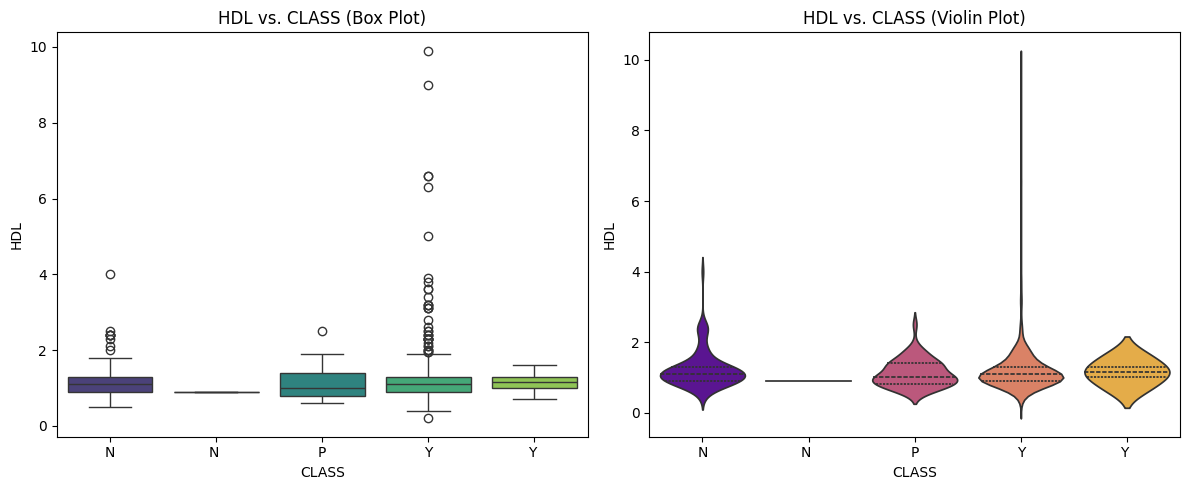

<ipython-input-26-9d1d194a74c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target_col], y=df[col], palette="viridis")
<ipython-input-26-9d1d194a74c7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[target_col], y=df[col], palette="plasma", inner="quartile")


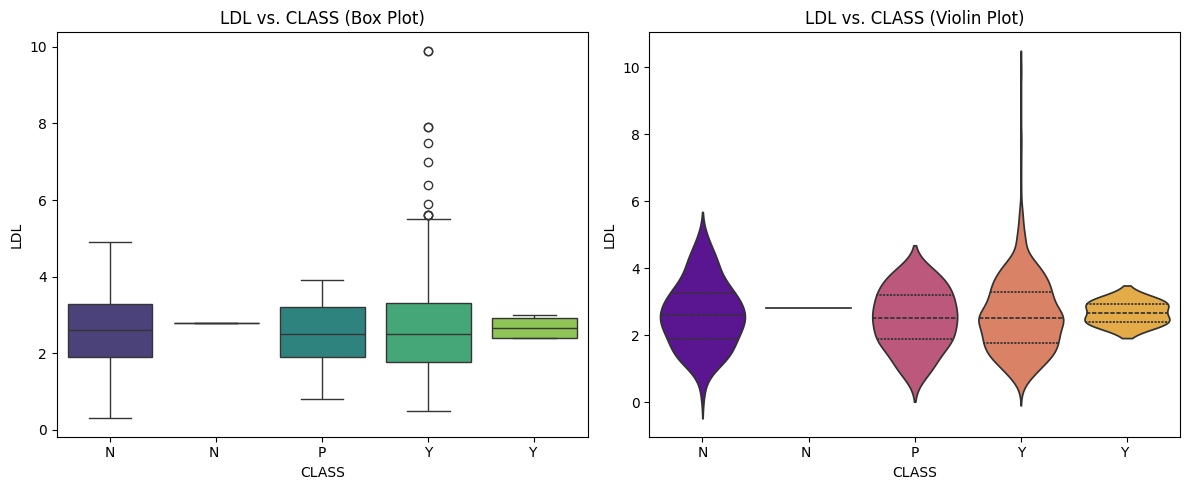

<ipython-input-26-9d1d194a74c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target_col], y=df[col], palette="viridis")
<ipython-input-26-9d1d194a74c7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[target_col], y=df[col], palette="plasma", inner="quartile")


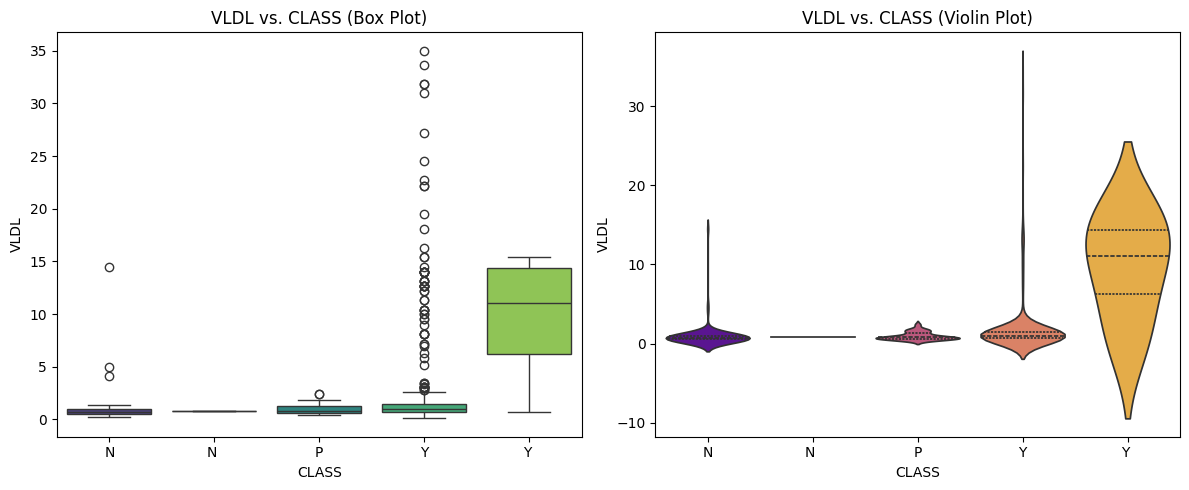

<ipython-input-26-9d1d194a74c7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target_col], y=df[col], palette="viridis")
<ipython-input-26-9d1d194a74c7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df[target_col], y=df[col], palette="plasma", inner="quartile")


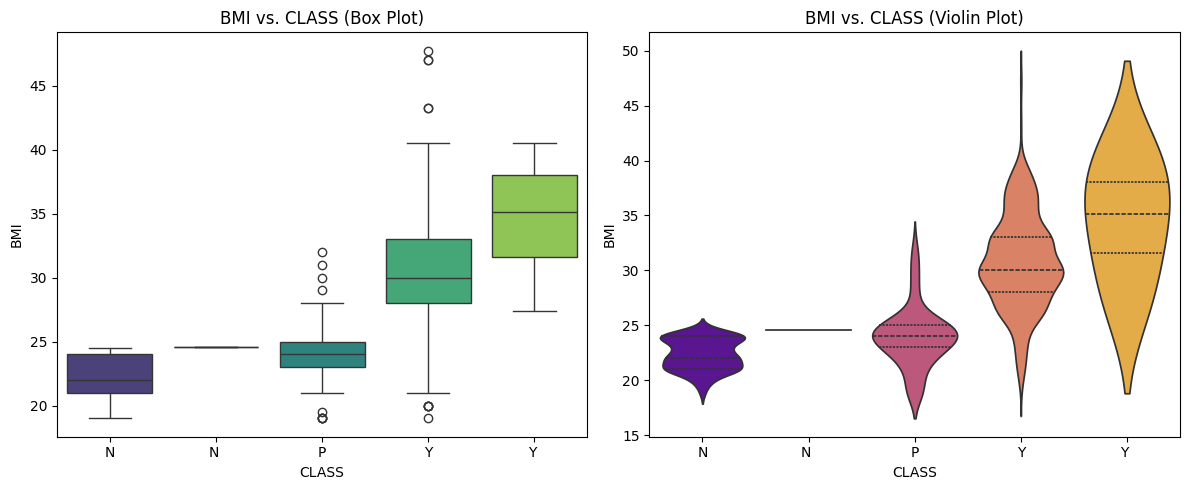

In [26]:
# Hubungan Antara Fitur Numerik dan Variabel Target ('CLASS')
if target_col in df.columns:
    for col in numerical_features:
        if col in df.columns:
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            sns.boxplot(x=df[target_col], y=df[col], palette="viridis")
            plt.title(f'{col} vs. {target_col} (Box Plot)')
            plt.xlabel(target_col)
            plt.ylabel(col)

            plt.subplot(1, 2, 2)
            sns.violinplot(x=df[target_col], y=df[col], palette="plasma", inner="quartile")
            plt.title(f'{col} vs. {target_col} (Violin Plot)')
            plt.xlabel(target_col)
            plt.ylabel(col)

            plt.tight_layout()
            plt.show()


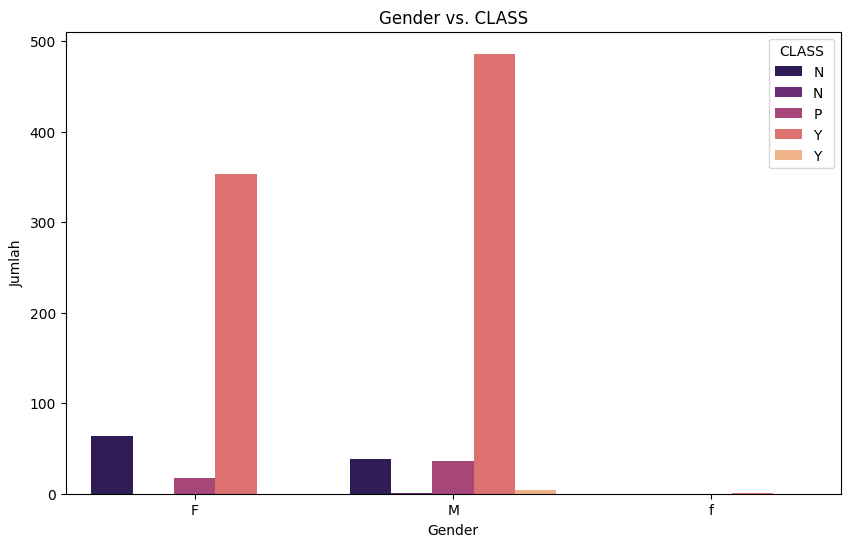

In [34]:
# Hubungan Antara Fitur Kategorikal dan Variabel Target ('CLASS')
if target_col in df.columns:
    for col in categorical_features_eda: # Menggunakan daftar fitur kategorikal dari univariate
        if col in df.columns:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=df[col], hue=df[target_col], data=df, palette="magma")
            plt.title(f'{col} vs. {target_col}')
            plt.xlabel(col)
            plt.ylabel('Jumlah')
            plt.legend(title=target_col)
            plt.show()


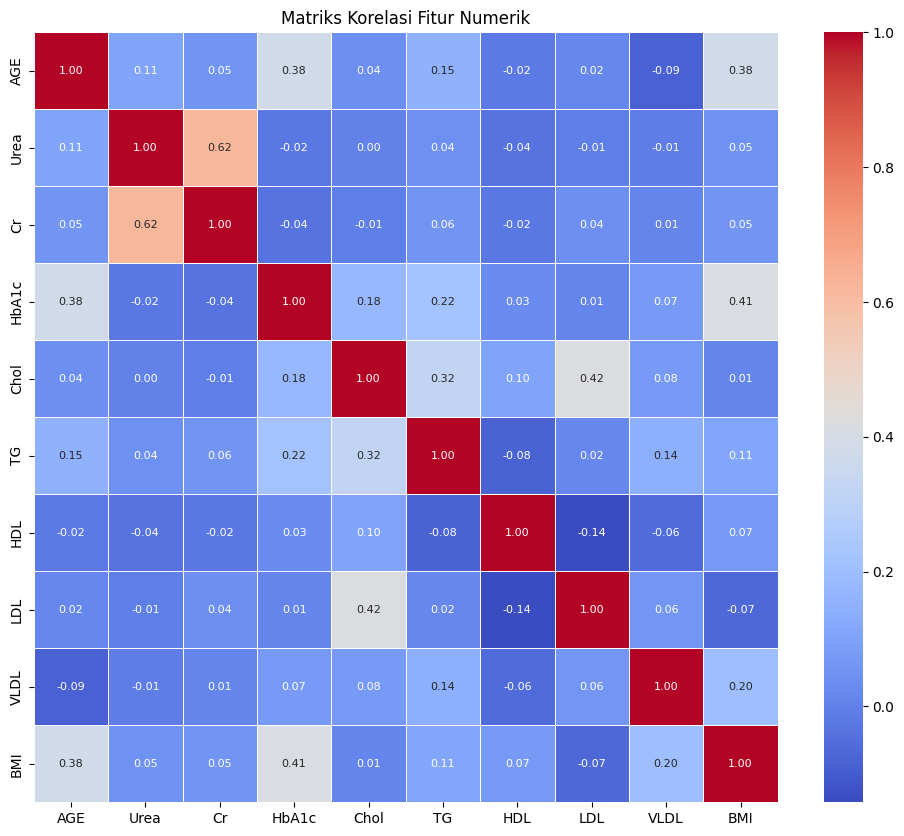

In [33]:
# Matriks Korelasi (Hubungan Antar Fitur Numerik)
df_numeric_corr = df[numerical_features].copy()

df_numeric_corr.empty and len(df_numeric_corr.columns) > 1
plt.figure(figsize=(12, 10))
correlation_matrix = df_numeric_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size":8})
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

Insight

*   Terdapat HUbungan dari beberapa data numerik di matriks korelasi
*   Jika kita lihat dari visualisasinya, masih ada kesalahan pada Gender dan CLASS nya kita akan mengatasi di data preparation





# 4. Data Preparation

## Mengatasi permasalahan 1

In [35]:
# Menghapus kolom yang tidak digunakan
df = df.drop(['ID', 'No_Pation'], axis=1)
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## Mengatasi Permasalahan 2

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   object 
 1   AGE     1000 non-null   int64  
 2   Urea    1000 non-null   float64
 3   Cr      1000 non-null   int64  
 4   HbA1c   1000 non-null   float64
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  BMI     1000 non-null   float64
 11  CLASS   1000 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 93.9+ KB


### Mengatasi Kolom Class

In [36]:
# Mengatasi Anomali kolom CLASS
df['CLASS'].value_counts()

,count
CLASS,
Y,840
N,102
P,53
Y,4
N,1


In [41]:
# mengubah kolom 'CLASS' type string
df['CLASS'] = df['CLASS'].astype(str)


df['CLASS'] = df['CLASS'].str.strip()

#map the values
class_mapping = {
    'N': 'Non-diabetic',
    'P': 'Prediabetic',
    'Y': 'Diabetic'
}

df['CLASS'] = df['CLASS'].map(class_mapping)
print(df['CLASS'].unique())

['Non-diabetic' 'Prediabetic' 'Diabetic']


In [43]:
df['CLASS'] = df['CLASS'].astype('category')

In [44]:
df['CLASS'].value_counts()

,count
CLASS,
Diabetic,844
Non-diabetic,103
Prediabetic,53


### Mengatasi kolom Gender

In [37]:
df['Gender'].value_counts()

,count
Gender,
M,565
F,434
f,1


In [39]:
df['Gender'] = df['Gender'].str.strip().str.upper()
df['Gender'].value_counts()

,count
Gender,
M,565
F,435


In [40]:
# Mengubah kolom Gender menjadi kategori
df['Gender'] = df['Gender'].astype('category')


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  1000 non-null   category
 1   AGE     1000 non-null   int64   
 2   Urea    1000 non-null   float64 
 3   Cr      1000 non-null   int64   
 4   HbA1c   1000 non-null   float64 
 5   Chol    1000 non-null   float64 
 6   TG      1000 non-null   float64 
 7   HDL     1000 non-null   float64 
 8   LDL     1000 non-null   float64 
 9   VLDL    1000 non-null   float64 
 10  BMI     1000 non-null   float64 
 11  CLASS   1000 non-null   category
dtypes: category(2), float64(8), int64(2)
memory usage: 80.5 KB


## Encode Kolom Kategorikal

In [47]:
# Encodind kolom kategorikal
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['CLASS'] = label_encoder.fit_transform(df['CLASS'])

# 5. Modeling & Evaluasi

In [48]:
# Persiapan data untuk modeling
X = df.drop('CLASS', axis=1)
y = df['CLASS']

In [49]:
# Split data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Algoritma Decission Tree

In [50]:
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [51]:
# Membuat Prediksi
y_pred = dt_classifier.predict(X_test)

accuracy_score(y_test, y_pred)


0.9866666666666667

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       254
           1       0.97      0.94      0.96        36
           2       0.91      1.00      0.95        10

    accuracy                           0.99       300
   macro avg       0.96      0.98      0.97       300
weighted avg       0.99      0.99      0.99       300



In [56]:

print(confusion_matrix(y_test, y_pred))

[[252   1   1]
 [  2  34   0]
 [  0   0  10]]


## Algoritma Random Forest

In [57]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [59]:
y_pred_rf = rf_model.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9866666666666667

In [61]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       254
           1       0.97      0.94      0.96        36
           2       1.00      0.90      0.95        10

    accuracy                           0.99       300
   macro avg       0.99      0.95      0.97       300
weighted avg       0.99      0.99      0.99       300



In [60]:
print(confusion_matrix(y_test, y_pred_rf))

[[253   1   0]
 [  2  34   0]
 [  1   0   9]]


## Algoritma Logistic Regression

In [63]:
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [64]:
y_pred_lr = logreg_model.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.9433333333333334

In [65]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       254
           1       0.84      0.89      0.86        36
           2       0.50      0.30      0.38        10

    accuracy                           0.94       300
   macro avg       0.77      0.72      0.74       300
weighted avg       0.94      0.94      0.94       300



In [66]:
print(confusion_matrix(y_test, y_pred_lr))

[[248   4   2]
 [  3  32   1]
 [  5   2   3]]


## Insight


1.   Performa Terbaik: Decision Tree (DT) dan Random Forest (RF) secara signifikan mengungguli Logistic Regression (LR) dengan akurasi keseluruhan yang identik dan sangat tinggi (~98.67%), sementara LR hanya mencapai ~94.33%.

2.   Keunggulan Model Berbasis Pohon (DT & RF):

*   Sangat efektif dalam mengklasifikasikan semua kelas, termasuk kelas mayoritas (Non-diabetic) dan kelas dengan jumlah sampel menengah (Prediabetic).

*   Untuk Kelas Minoritas (Diabetic - Kelas 2):

  *   Decision Tree (max_depth=5): Unggul dalam menemukan semua kasus aktual Diabetic (Recall 100%).

  *   Random Forest: Unggul dalam memastikan bahwa prediksi Diabetic yang dibuatnya benar-benar akurat (Presisi 100%).

3. Kelemahan Logistic Regression:
* Kurang mampu menangkap pola kompleks dalam data dibandingkan model pohon, yang terlihat dari akurasi yang lebih rendah.
* Sangat kesulitan mengidentifikasi Kelas 2 (Diabetic), dengan tingkat presisi dan recall yang jauh lebih rendah. Ini menunjukkan bahwa batas keputusan linear mungkin tidak cukup untuk memisahkan kelas ini dengan baik. (Perlu diingat, tidak adanya penskalaan fitur mungkin juga berkontribusi pada performa LR yang lebih rendah).

Secara singkat, Decision Tree dan Random Forest adalah pilihan yang sangat baik dan hampir setara untuk dataset ini, sementara Logistic Regression kurang optimal, terutama untuk kelas dengan jumlah sampel sedikit


# Membuat PREDIKSI DENGAN RANDOM DATA

In [148]:
import random

In [210]:
# 1. Sampel Data Acak Anda
# Buat sample dengan Gender string asli
random_sample = pd.DataFrame({
    'Gender': [random.choice(['M', 'F'])],
    'AGE': [np.random.randint(20, 70)],
    'Urea': [np.random.uniform(2.0, 8.0)],
    'Cr': [np.random.randint(30, 100)],
    'HbA1c': [np.random.uniform(3.5, 10.0)],
    'Chol': [np.random.uniform(3.0, 7.0)],
    'TG': [np.random.uniform(0.5, 5.0)],
    'HDL': [np.random.uniform(0.5, 2.0)],
    'LDL': [np.random.uniform(1.0, 5.0)],
    'VLDL': [np.random.uniform(0.1, 1.5)],
    'BMI': [np.random.uniform(18, 35)]
})
print("Sampel Data Acak (Sebelum Encoding Gender):")
print(random_sample)

# Melakukan Encoding pada Gender
random_sample['Gender'] = random_sample['Gender'].map({'M': 1, 'F': 0})
# print("\nSetelah encoding:")
# print(random_sample)
# print("Tipe Gender:", type(random_sample['Gender'][0]))

# Decision Tree
dt_pred = dt_classifier.predict(random_sample)
dt_proba = dt_classifier.predict_proba(random_sample)

# Random Forest
rf_pred = rf_model.predict(random_sample)
rf_proba = rf_model.predict_proba(random_sample)

# Logistic Regression
logreg_pred = logreg_model.predict(random_sample)
logreg_proba = logreg_model.predict_proba(random_sample)

# Mapping hasil prediksi
class_mapping = {0: 'No Diabetes', 1: 'Prediabetes', 2: 'Diabetes'}

# Tampilkan hasil
print("===== PREDIKSI DENGAN BERBAGAI MODEL =====")
print(f"Decision Tree Prediction: {class_mapping[dt_pred[0]]}")
print(f"Decision Tree Probabilities: {dict(zip(class_mapping.values(), dt_proba[0]))}\n")

print(f"Random Forest Prediction: {class_mapping[rf_pred[0]]}")
print(f"Random Forest Probabilities: {dict(zip(class_mapping.values(), rf_proba[0]))}\n")

print(f"Logistic Regression Prediction: {class_mapping[logreg_pred[0]]}")
print(f"Logistic Regression Probabilities: {dict(zip(class_mapping.values(), logreg_proba[0]))}")


Sampel Data Acak (Sebelum Encoding Gender):
  Gender  AGE      Urea  Cr     HbA1c      Chol        TG      HDL       LDL  \
0      F   35  7.671964  47  7.556572  3.595928  3.220209  1.64041  1.859667   

       VLDL        BMI  
0  0.799067  21.742575  
===== PREDIKSI DENGAN BERBAGAI MODEL =====
Decision Tree Prediction: No Diabetes
Decision Tree Probabilities: {'No Diabetes': np.float64(1.0), 'Prediabetes': np.float64(0.0), 'Diabetes': np.float64(0.0)}

Random Forest Prediction: No Diabetes
Random Forest Probabilities: {'No Diabetes': np.float64(0.6), 'Prediabetes': np.float64(0.14), 'Diabetes': np.float64(0.26)}

Logistic Regression Prediction: Diabetes
Logistic Regression Probabilities: {'No Diabetes': np.float64(0.3710756341083947), 'Prediabetes': np.float64(0.07110739271850794), 'Diabetes': np.float64(0.5578169731730973)}


## Insight

Jadi saya membuat kode ini untuk mendeteksi seorang pasien yang memiliki diabetes dengan pendekatan Machine Learning menggunakan 3 algoritma. Dan saya sudah menjalankan sekitar 10 kali percobaan, dan hasilnya terkadang pada algoritma Logistic regression memiliki Hasil deteksi yang berbeda